In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def a_or_c(x):
    if x == 'C':
        return 2.3
    elif x == 'A':
        return 1
    return x

In [18]:

data = pd.read_csv('/home/guest/Downloads/COVID Antibody tests - Data.csv')
data['Active or cumulative'] = data['Active or cumulative'].apply(a_or_c)
data['Foretold adjusted'] = (data['Foretold (whole country, April 5)']*
                             data['Percentage of total country deaths attributable to city']*
                             data['Active or cumulative'])
data['Sheet model adjusted'] = (data['Model active cases']*
                             data['Percentage of total country deaths attributable to city']*
                             data['Active or cumulative'])
data['Conv model adjusted'] = (data['Conv model .8% fatality']*
                             data['Percentage of total country deaths attributable to city'])
data['Cases'] = data['Prevalence']*data['Relevant population']

In [19]:
((data['Foretold adjusted']-data['Cases'])/data['Cases']).mean()

0.8673284280854316

In [20]:
((data['Sheet model adjusted']-data['Cases'])/data['Cases']).mean()

0.7242317031497272

In [21]:
((data['Conv model adjusted']-data['Cases'])/data['Cases']).mean()

0.14873017234376568

In [22]:
(np.abs(data['Foretold adjusted']-data['Cases'])/data['Cases']).mean()

1.1283675191240587

In [23]:
(np.abs(data['Sheet model adjusted']-data['Cases'])/data['Cases']).mean()

1.1929346508128467

In [24]:
(np.abs(data['Conv model adjusted']-data['Cases'])/data['Cases']).mean()

0.4043312005632467

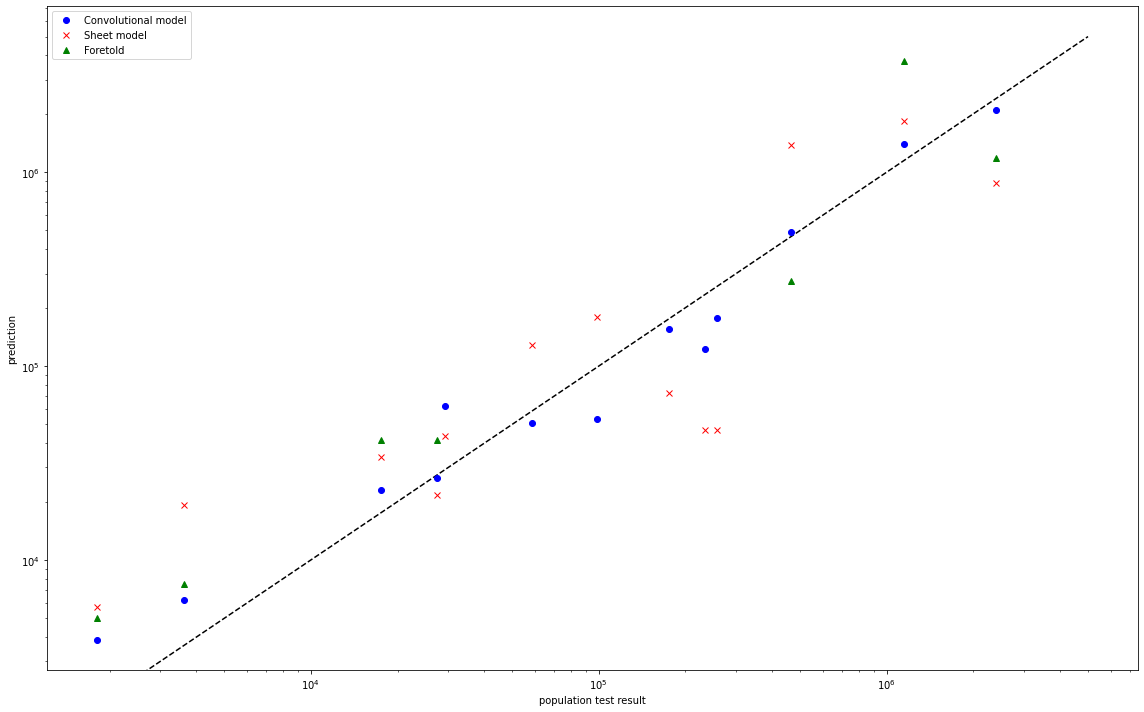

In [31]:
fig,ax = plt.subplots(figsize=(16,10))
plt.loglog([0,5e6],[0,5e6],'k--')
plt.loglog(data['Cases'],data['Conv model adjusted'],'bo',label='Convolutional model')
plt.loglog(data['Cases'],data['Sheet model adjusted'],'rx',label='Sheet model')
plt.loglog(data['Cases'],data['Foretold adjusted'],'g^',label='Foretold')
plt.legend()
plt.ylabel('prediction')
plt.xlabel('population test result')
plt.tight_layout()
plt.savefig('model_evaluation.png')

In [17]:
data[['Country','Conv model adjusted']]

,Country,Conv model adjusted
0,Finland,NaN
1,Finland,NaN
2,Finland,NaN
3,Sweden,4.053497e+05
4,Denmark,1.221990e+05
5,Sweden,3.571049e+05
6,Sweden,5.100000e+04
7,US,4.801173e+06
8,US,1.438300e+04
9,Germany,8.912003e+03
